# Modélisation : Test des différents algorithmes

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('SeoulBikeData.csv', sep=',')

## Transformation des mots en chiffre

In [2]:
data['Holiday (int)'] = data['Holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)

data.loc[data['Seasons'] == 'Winter', 'Seasons (int)'] = 1
data.loc[data['Seasons'] == 'Spring', 'Seasons (int)'] = 2
data.loc[data['Seasons'] == 'Summer', 'Seasons (int)'] = 3
data.loc[data['Seasons'] == 'Autumn', 'Seasons (int)'] = 4
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")

data['Functioning Day (int)'] = data['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)

df = data.drop(['Holiday', 'Date', 'Seasons', 'Functioning Day'], axis=1)

df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday (int),Seasons (int),Functioning Day (int)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1.0,1


## Les données

Nous allons utilisé deux set d'entrée (X) sur les différents test.

- Le premier garde toutes les informations (colonnes) données par le dataset (sauf date et functionning day)
- Le deuxième garde seulement les informations que nous avons déduit importante dans la partie Data-visualisation 

In [3]:
df = df[df['Functioning Day (int)'] == 1]
X = df.iloc[:, 1:12]
y = df.iloc[:, 0]

X2 = df.iloc[:, 1:12]
X2 = X2.drop(['Dew point temperature(°C)'], axis=1)
X2['working_day'] = (data['Date'].dt.dayofweek < 5).astype(np.int)

X2['month'] = data['Date'].dt.month_name()
X2.loc[X2['month'] == 'January', 'month (int)'] = 1
X2.loc[X2['month'] == 'February', 'month (int)'] = 2
X2.loc[X2['month'] == 'March', 'month (int)'] = 3
X2.loc[X2['month'] == 'April', 'month (int)'] = 4
X2.loc[X2['month'] == 'May', 'month (int)'] = 5
X2.loc[X2['month'] == 'June', 'month (int)'] = 6
X2.loc[X2['month'] == 'July', 'month (int)'] = 7
X2.loc[X2['month'] == 'August', 'month (int)'] = 8
X2.loc[X2['month'] == 'September', 'month (int)'] = 9
X2.loc[X2['month'] == 'October', 'month (int)'] = 10
X2.loc[X2['month'] == 'November', 'month (int)'] = 11
X2.loc[X2['month'] == 'December', 'month (int)'] = 12
X2 = X2.drop(['month'], axis=1)

Séparation en train et test set :

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

scaler2 = StandardScaler()
scaler2.fit(X_train2)
X_train2 = scaler2.transform(X_train2)
X_test2  = scaler2.transform(X_test2)  # apply same transformation to test data

In [6]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday (int),Seasons (int)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1.0


In [7]:
X2.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday (int),Seasons (int),working_day,month (int)
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1.0,1,12.0
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1.0,1,12.0
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1.0,1,12.0
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1.0,1,12.0
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1.0,1,12.0


## Fonction pour different algorithm

In [8]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression
from sklearn.linear_model import LogisticRegression
def MLogisticR(trainX,trainy):
    grid = GridSearchCV(LogisticRegression(), {}, n_jobs=-1)
    grid.fit(trainX, trainy)
    return grid.best_estimator_
    # return LogisticRegression(random_state=0).fit(trainX, trainy)

# Linear Regression
from sklearn.linear_model import LinearRegression
def MLinearR(trainX, trainy):
    grid = GridSearchCV(LinearRegression(), {}, n_jobs=-1)
    grid.fit(trainX, trainy)
    return grid.best_estimator_

# SVR
from sklearn import svm
def MSVR(trainX, trainy):
    parameters = {  'C'       : [190, 200, 250, 260]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [1.5, 2, 2.5],
                 "degree" : [1,2]}
    grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
    grid.fit(trainX, trainy)
    return grid.best_estimator_

# SVC
def MSVC(trainX, trainy):
    parameters = {  "C"              : [1.0],#, 0.5, 0.1, 2]                , 
                "kernel"         : ['rbf'],#, 'poly', 'sigmoid']        ,
                "degree"         : [2],#, 3, 4,5,6]                     , 
                "gamma"          : [0.01],#, 0.1, 0.001, 0.5]           , 
                "coef0"          : [0.0]                             , 
                "shrinking"      : [True]                            , 
                "probability"    : [True]                            , 
                "tol"            : [0.001]                           , 
                "cache_size"     : [10]                              , 
                "class_weight"   : [None]                            , 
                "verbose"        : [False]                           , 
                "max_iter"       : [-1]                              , 
                "random_state"   : [None]                            }
    grid = GridSearchCV(svm.SVC(), parameters, n_jobs=-1)
    grid.fit(trainX, trainy)
    return grid.best_estimator_

# KNN
from sklearn.neighbors         import KNeighborsClassifier
def MKNN(trainX, trainy):
    parameters = {  "n_neighbors"    : [2, 3, 5, 8 , 10, 15, 20]                , 
                "weights"         : ['uniform', 'distance']                  ,
                "algorithm"      : ['auto', 'ball_tree', 'kd_tree', 'brute'] }
    grid = GridSearchCV(KNeighborsClassifier(), parameters, n_jobs=-1)
    grid.fit(trainX, trainy)
    return grid.best_estimator_

# Random Forest Classifier
from sklearn.ensemble          import RandomForestClassifier
def MRandomFC(trainX, trainy):
    grid = GridSearchCV(RandomForestClassifier(), {}, n_jobs=-1)
    grid.fit(trainX, trainy)
    return grid.best_estimator_

## Score de chaque algorithme avec nos données

In [9]:
scoreFull = []
scorePart = []
axeX = ["Logistic Regression", "Linear Regression", "SVR", "SVC", "Knn", "Random Forest Classifier"]#, "Gradient Boosting Classifier"]
modelFull = []
modelPart = []

In [10]:
temp = MLogisticR(X_train, y_train)
scoreFull.append(temp.score(X_test, y_test))
modelFull.append(temp)

temp = MLinearR(X_train, y_train)
scoreFull.append(temp.score(X_test, y_test))
modelFull.append(temp)

temp = MSVR(X_train, y_train)
scoreFull.append(temp.score(X_test, y_test))
modelFull.append(temp)

temp = MSVC(X_train, y_train)
scoreFull.append(temp.score(X_test, y_test))
modelFull.append(temp)

temp = MKNN(X_train, y_train)
scoreFull.append(temp.score(X_test, y_test))
modelFull.append(temp)

temp = MRandomFC(X_train, y_train)
scoreFull.append(temp.score(X_test, y_test))
modelFull.append(temp)

In [11]:
temp = MLogisticR(X_train2, y_train2)
scorePart.append(temp.score(X_test2, y_test2))
modelPart.append(temp)

temp = MLinearR(X_train2, y_train2)
scorePart.append(temp.score(X_test2, y_test2))
modelPart.append(temp)

temp = MSVR(X_train2, y_train2)
scorePart.append(temp.score(X_test2, y_test2))
modelPart.append(temp)

temp = MSVC(X_train2, y_train2)
scorePart.append(temp.score(X_test2, y_test2))
modelPart.append(temp)

temp = MKNN(X_train2, y_train2)
scorePart.append(temp.score(X_test2, y_test2))
modelPart.append(temp)

temp = MRandomFC(X_train2, y_train2)
scorePart.append(temp.score(X_test2, y_test2))
modelPart.append(temp)

In [12]:
print(scoreFull)
print(scorePart)

[0.0021474588403722263, 0.549573231814608, 0.7012153648342616, 0.0017895490336435219, 0.002863278453829635, 0.0021474588403722263]
[0.0025053686471009306, 0.5531975743956453, 0.7107327221807431, 0.0010737294201861132, 0.005010737294201861, 0.006084466714387974]


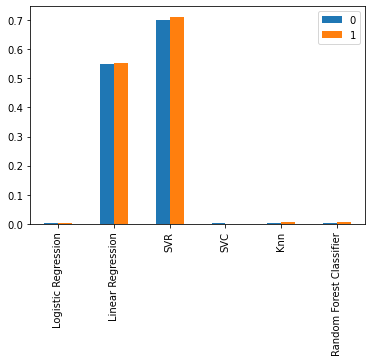

In [13]:
import matplotlib.pyplot as plt

plot = pd.DataFrame(np.c_[scoreFull, scorePart], index=axeX)
plot.plot.bar()

plt.show()

## On enregistre le scaler et le modèle pour l'API Django

In [17]:
import joblib

In [20]:
path_for_scaler = "scaler.pkl"
joblib.dump(scaler2, path_for_scaler)

['scaler.pkl']

In [21]:
path_where_to_save =  'model_svr.pkl'
joblib.dump(modelPart[2], path_where_to_save)

['model_svr.pkl']